### Technical Analyisis Indicators Implementation

Importing the required libraries

In [239]:
import numpy  
import pandas as pd  
import math
import matplotlib.pyplot as plt
import pandas_datareader as pdr

##### I have demonstrated the implementation of the below technical indicators in this notebook:

1. Moving Average
2. Exponential Moving Average
3. Bollinger Bands
4. Moving Average Convergence Divergence (MACD)

Getting the historical data for the stock from Yahoo Finance API call through pandas data reader.

**Note: i have used adjusted close price here to compute these indicators**

In [246]:
stock = (str(input("Enter Stock Name: ")))

start_date = str(input("Enter Start Date for Historical Stock Price (YYYY-MM-DD): "))
end_date = str(input("Enter End Date for Historical Stock Price (YYYY-MM-DD): "))

    
#['AAPL','AMZN','GOOGL','FB','TSLA','BBQ']

df = pdr.get_data_yahoo(stock,
                           start = start_date,
                           end = end_date)['Adj Close']

stock_data = pd.DataFrame(df)
stock_data.head()

Enter Stock Name: FB
Enter Start Date for Historical Stock Price (YYYY-MM-DD): 2020-01-01
Enter End Date for Historical Stock Price (YYYY-MM-DD): 2020-11-25


,Adj Close
Date,
2019-12-31,205.250000
2020-01-02,209.779999
2020-01-03,208.669998
2020-01-06,212.600006
2020-01-07,213.059998


#### Moving Average

In [247]:
#Moving Average  
def ma(df, n):  
    ma = pd.Series(df['Adj Close'].rolling(n).mean(), name = 'ma-' + str(n))  
    df = df.join(ma)  
    return df

#### Exponential Moving Average

In [293]:
#Exponential Moving Average  
def ema(df, n):  
    ema = pd.Series(df['Adj Close'].ewm(halflife = n, min_periods = n-1).mean(), name = 'ema-' + str(n))  
    df = df.join(ema)  
    return df

#### Bollinger Bands

In [294]:
#Bollinger Bands  
def bol_bands(df, n):  
    B1 = pd.Series(df['Adj Close'].rolling(n).mean(), name = 'BB1_' + str(n))  
    df = df.join(B1)
    mstd = pd.Series(df['Adj Close'].rolling(n).std())  
    b2 = B1 + 2 * mstd   
    B2 = pd.Series(b2, name = 'BB2_' + str(n))  
    df = df.join(B2)  
    b3 = B1 - 2 * mstd  
    B3 = pd.Series(b3, name = 'BB3_' + str(n))  
    df = df.join(B3)  
    return df

#### MACD

In [295]:
#MACD, MACD Signal line & MACD difference line

def macd(df, n_fast, n_slow):  
    EMAfast = pd.Series(df['Adj Close'].ewm(span = n_fast, min_periods = n_slow - 1).mean())  
    EMAslow = pd.Series(df['Adj Close'].ewm(span = n_slow, min_periods = n_slow - 1).mean())  
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(MACD.ewm(span = 9, min_periods = 8).mean(), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [296]:
df_ma = ma(stock_data,10)
df_ma.tail()

,Adj Close,ma-10
Date,,
2020-11-19,272.940002,277.198999
2020-11-20,269.700012,274.828000
2020-11-23,268.429993,273.794000
2020-11-24,276.920013,274.243002
2020-11-25,275.589996,274.154001


In [297]:
df_ema = ema(stock_data,10)
df_ema.tail()

,Adj Close,ema-10
Date,,
2020-11-19,272.940002,274.140516
2020-11-20,269.700012,273.843149
2020-11-23,268.429993,273.480646
2020-11-24,276.920013,273.710970
2020-11-25,275.589996,273.836803


In [298]:
df_bb = bol_bands(stock_data,10)
df_bb.head()

,Adj Close,BB1_10,BB2_10,BB3_10
Date,,,,
2019-12-31,205.250000,NaN,NaN,NaN
2020-01-02,209.779999,NaN,NaN,NaN
2020-01-03,208.669998,NaN,NaN,NaN
2020-01-06,212.600006,NaN,NaN,NaN
2020-01-07,213.059998,NaN,NaN,NaN


In [299]:
df_macd = macd(stock_data, 12,26)

### Plotting the Indicators

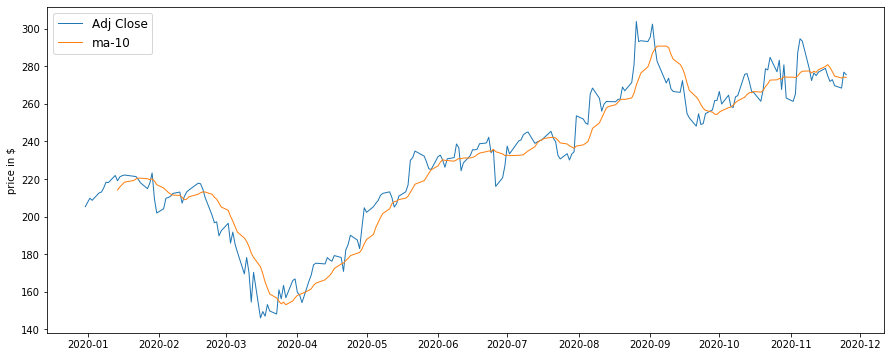

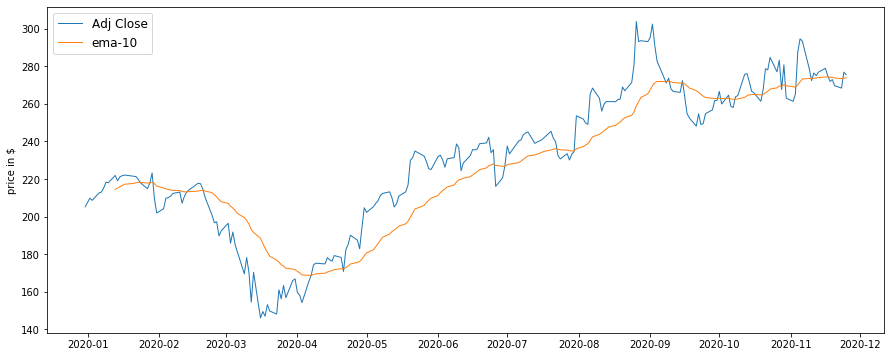

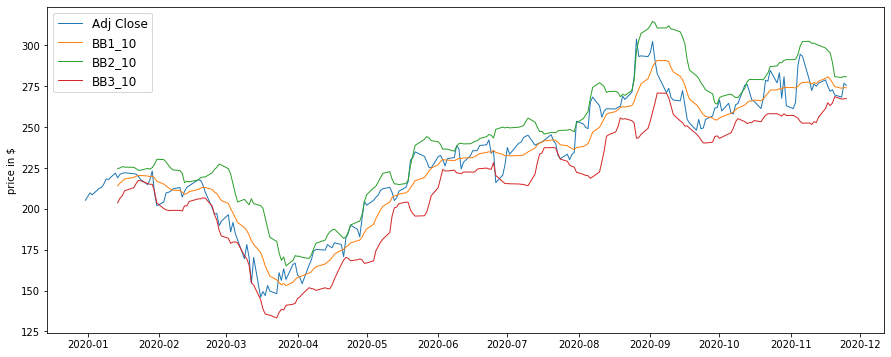

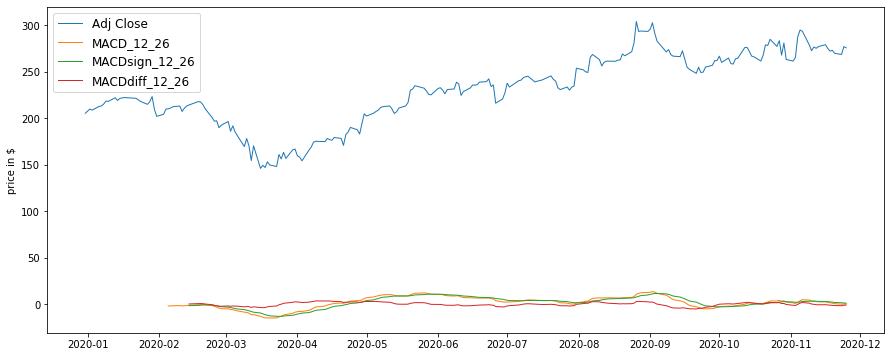

In [300]:
plots = [df_ma, df_ema, df_bb, df_macd]

for n in plots:
    plt.figure(figsize=(15, 6))
    for i in n.columns.values:
        plt.plot(n.index, n[i], lw=1, alpha=1,label=i)
        plt.legend(loc='upper left', fontsize=12)
        plt.ylabel('price in $')